In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd

from tensorflow.keras.datasets import mnist

2023-02-03 14:38:21.897084: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("X_train = ", X_train.shape)
print("y_train = ", y_train.shape)
print("X_test = ", X_test.shape)
print("y_test = ", y_test.shape)

X_train =  (60000, 28, 28)
y_train =  (60000,)
X_test =  (10000, 28, 28)
y_test =  (10000,)


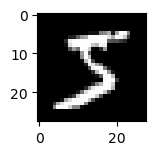

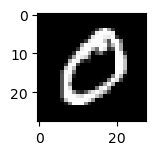

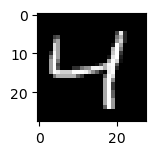

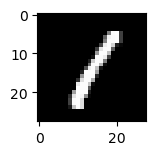

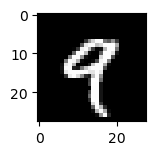

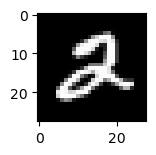

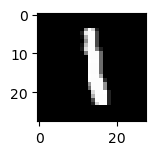

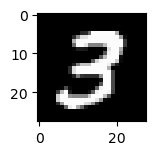

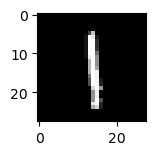

In [6]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.show()